In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [6]:
dataset=pd.read_csv('Black_friday_prediction.csv')

In [7]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
## Working on nan values

In [10]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
features_with_nan=[i for i in dataset if dataset[i].isnull().sum() >1]

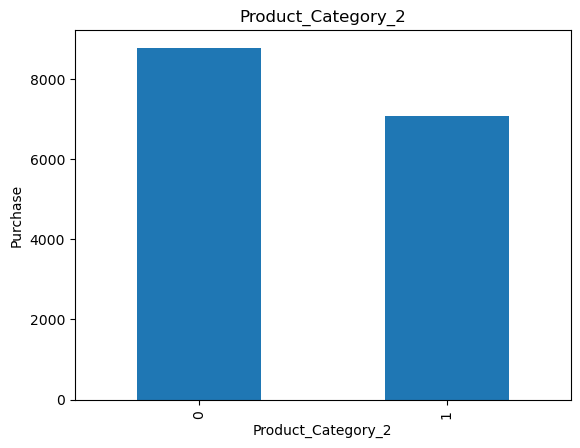

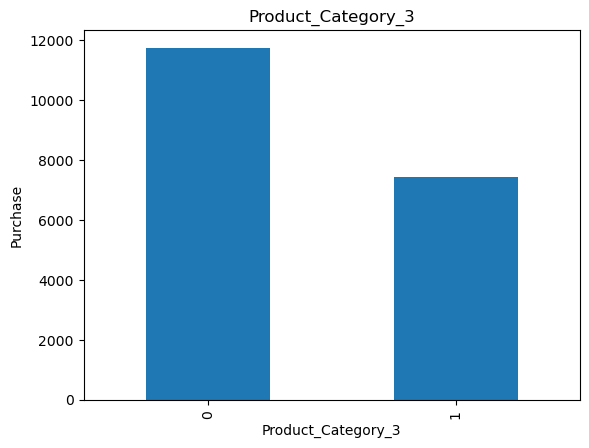

In [16]:
data=dataset.copy()
for i in features_with_nan:
    data[i]=np.where(data[i].isnull(),1,0)
    data.groupby(i)['Purchase'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Purchase')
    plt.title(i)
    plt.show()

In [17]:
## We can observe that the purchase value is more in case of missing values.

In [21]:
## Numeric Variables

In [25]:
numerical_features=[i for i in dataset if dataset[i].dtype != 'O'] 

In [26]:
dataset[numerical_features].head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969


In [31]:
discrete_features=[i for i in numerical_features if len(dataset[i].unique()) <=20]

In [32]:
# comparing relation between purchase and discrete features

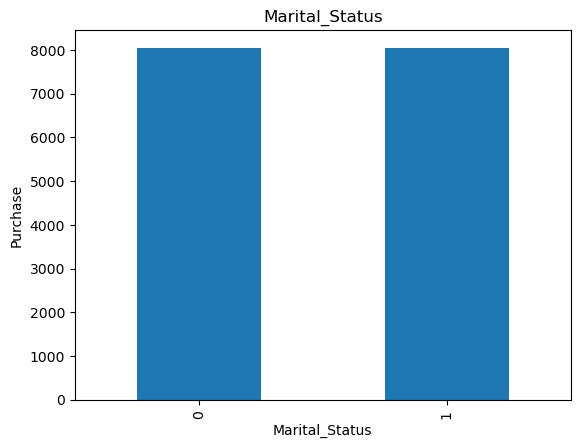

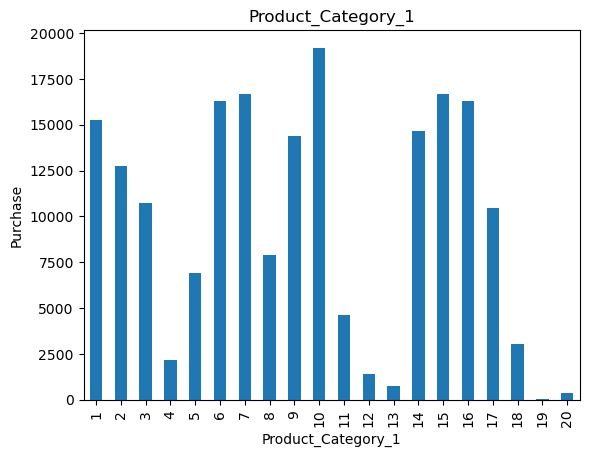

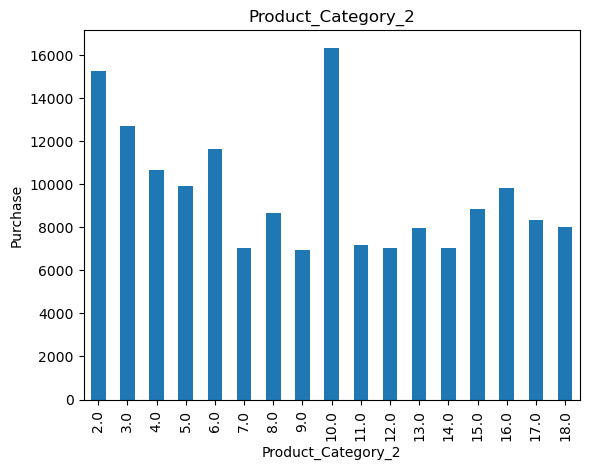

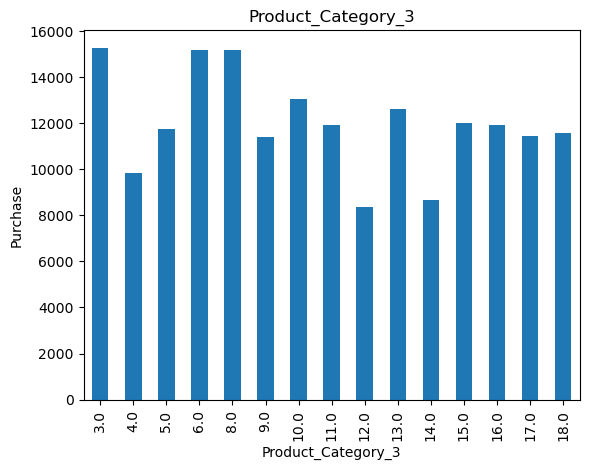

In [34]:
data=dataset.copy()
for i in discrete_features:
    data.groupby(i)['Purchase'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Purchase')
    plt.title(i)
    plt.show()

In [44]:
## Continuous Features

In [37]:
continuous_features=[i for i in numerical_features if i not in discrete_features]

In [43]:
dataset[continuous_features].head()

,User_ID,Occupation,Purchase
0,1000001,10,8370
1,1000001,10,15200
2,1000001,10,1422
3,1000001,10,1057
4,1000002,16,7969


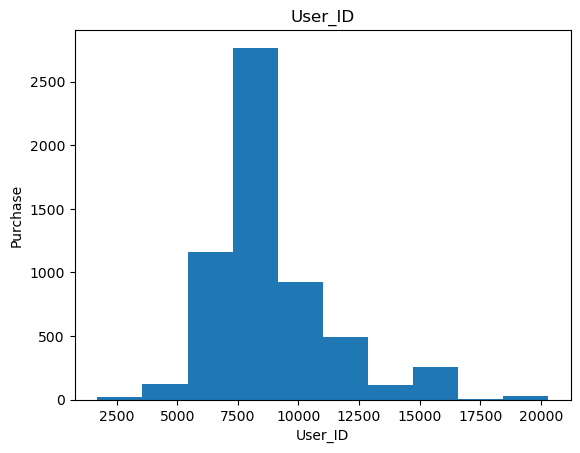

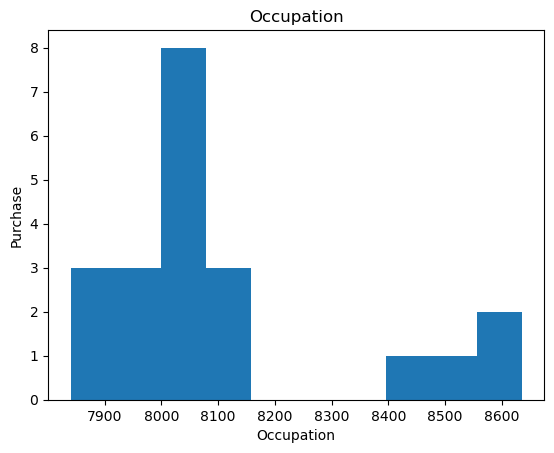

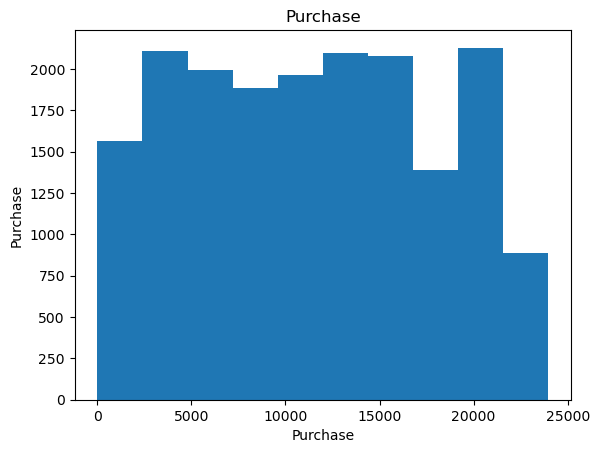

In [45]:
data=dataset.copy()
for i in continuous_features:
    data.groupby(i)['Purchase'].median().plot.hist()
    plt.xlabel(i)
    plt.ylabel('Purchase')
    plt.title(i)
    plt.show()

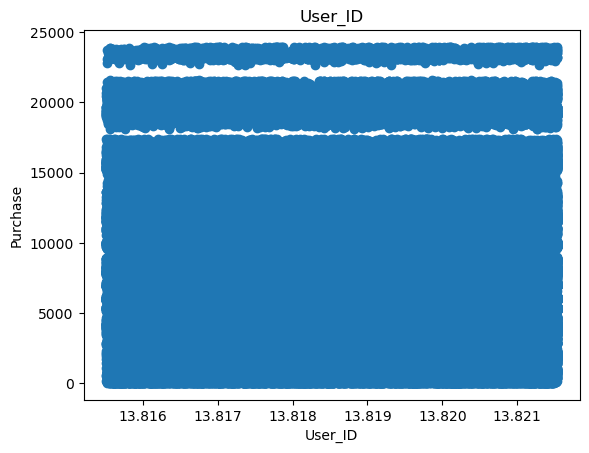

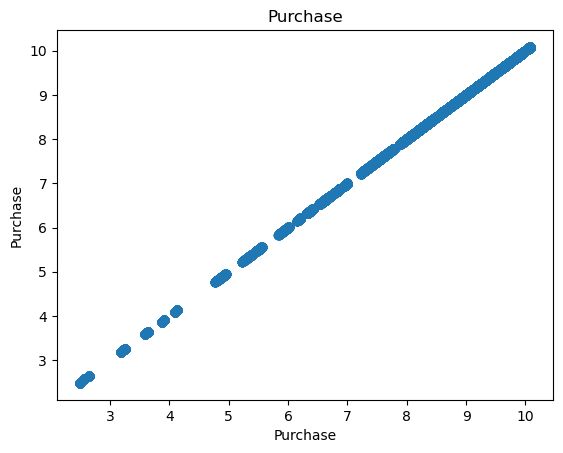

In [56]:
## We will be using logarithmic transformation
data=dataset.copy()
for i in continuous_features:
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        plt.scatter(data[i],data['Purchase'])
        plt.xlabel(i)
        plt.ylabel('Purchase')
        plt.title(i)
        plt.show()

In [46]:
## Outliers in continuous features

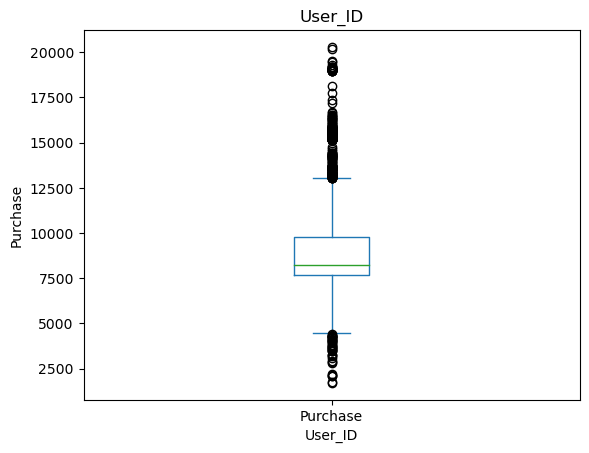

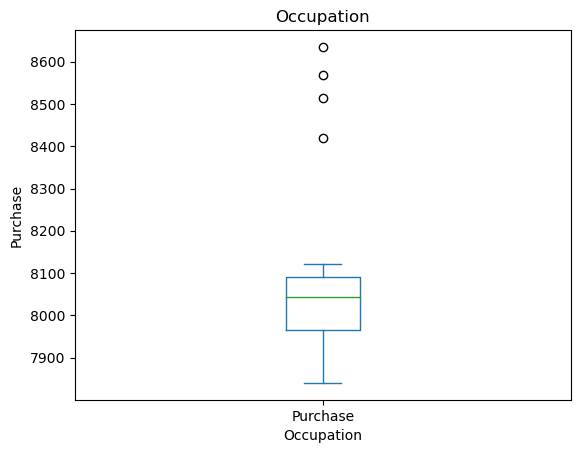

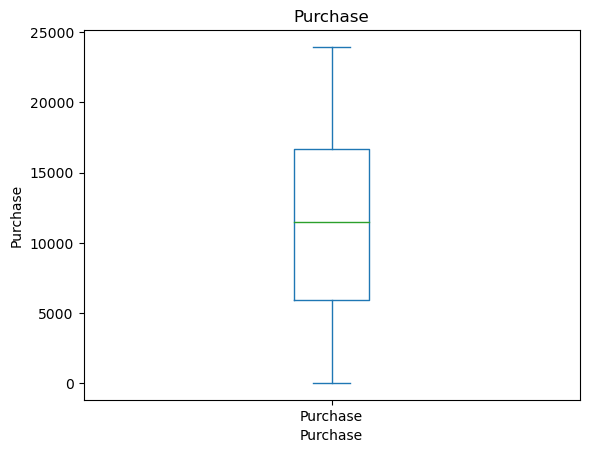

In [47]:
data=dataset.copy()
for i in continuous_features:
    data.groupby(i)['Purchase'].median().plot.box()
    plt.xlabel(i)
    plt.ylabel('Purchase')
    plt.title(i)
    plt.show()

In [48]:
## Categorical Variables

In [54]:
categorical_features=[i for i in dataset if dataset[i].dtype == 'O']

In [55]:
dataset[categorical_features].head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


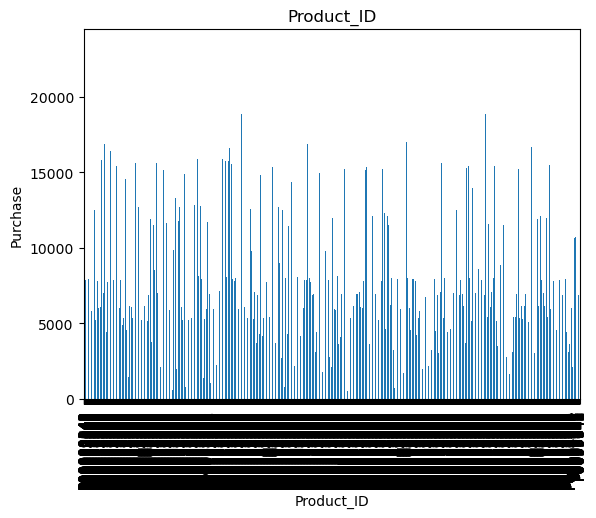

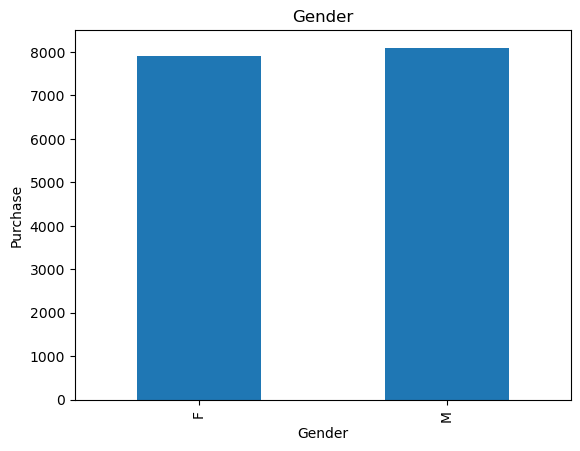

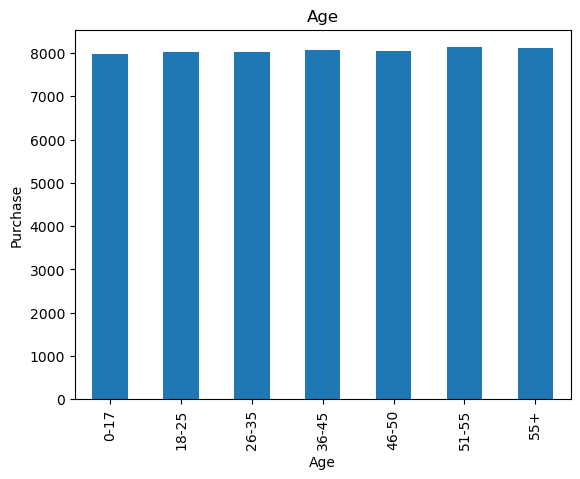

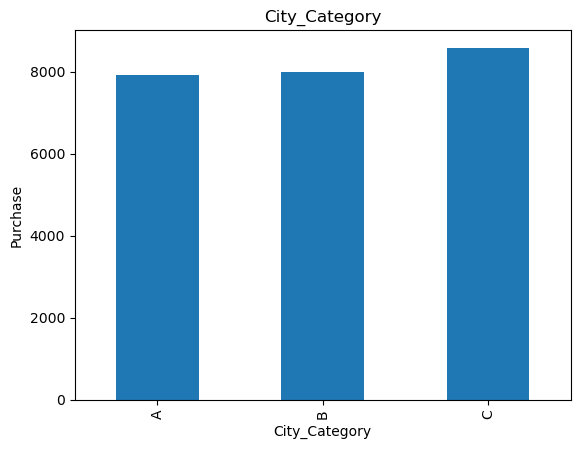

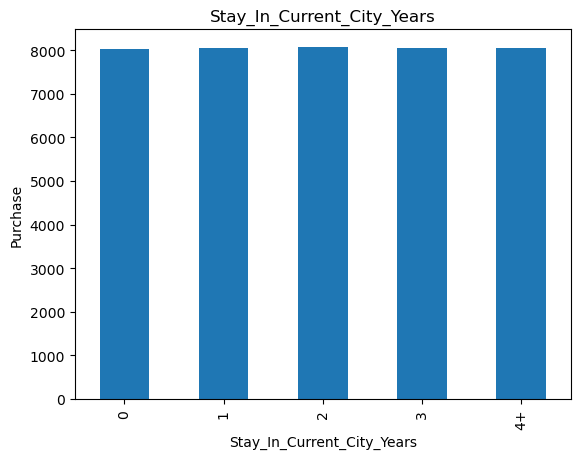

In [58]:
#Relationship b/w categorical_features and Sales Price:
data=dataset.copy()
for i in categorical_features:
    data.groupby(i)['Purchase'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Purchase')
    plt.title(i)
    plt.show()